# Challenge: Boston Marathon

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters.

In [1]:
######## Imports ###########
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Models
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
######### Bring in Data #############
data = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


## Exploritory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


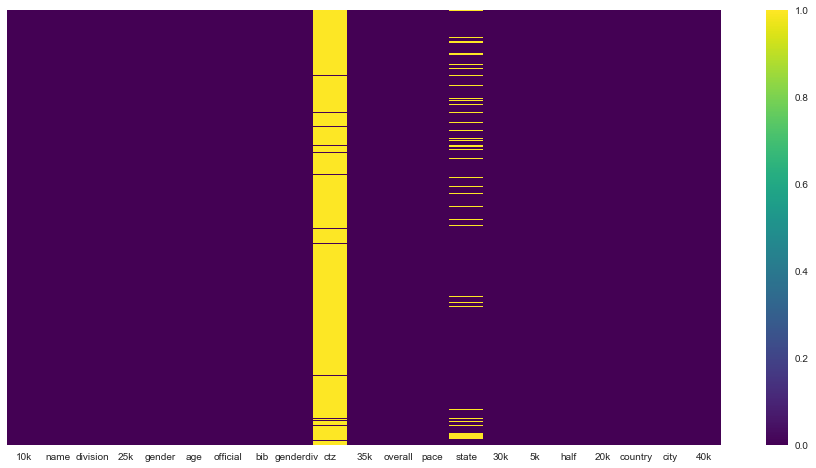

In [5]:
# View missing Data
plt.figure(figsize=(16,8))
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

In [23]:
#This is to show that there are some times that are not plotted
data[data['5k']=='-'].count()['10k']

52

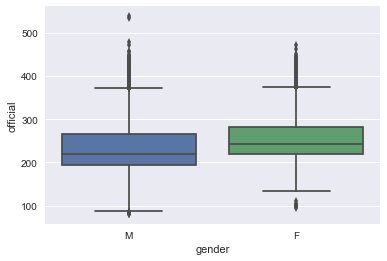

In [16]:
# Goal: I want to do a plot that shows the box plot for the different blocks with a hue of gender.
sns.boxplot(x='gender',y='official',data=data)

In [20]:
# Want to remove with missing splits. So first need to check the population stats for the entire population
mean = data['official'].mean()
std = data['official'].std()

print('The population parameters are: Mean({}) and STD({})'.format(mean,std))

The population parameters are: Mean(242.9973142821393) and STD(52.30043079355835)


In [3]:
blank_removed = data[data['5k']!='-']
blank_removed = blank_removed[blank_removed['10k']!='-']
blank_removed = blank_removed[blank_removed['25k']!='-']
blank_removed = blank_removed[blank_removed['30k']!='-']
blank_removed = blank_removed[blank_removed['35k']!='-']
blank_removed = blank_removed[blank_removed['40k']!='-']
blank_removed = blank_removed[blank_removed['half']!='-']

In [4]:
mean = blank_removed['official'].mean()
std = blank_removed['official'].std()

print('The population parameters are: Mean({}) and STD({})'.format(mean,std))

The population parameters are: Mean(241.95913059960634) and STD(50.85287789908615)


In [5]:
# Convert the columns
blank_removed['5k']= blank_removed['5k'].astype('float', copy=False)
blank_removed['10k']= blank_removed['10k'].astype('float', copy=False)
blank_removed['25k']= blank_removed['25k'].astype('float', copy=False)
blank_removed['30k']= blank_removed['30k'].astype('float', copy=False)
blank_removed['35k']= blank_removed['35k'].astype('float', copy=False)
blank_removed['40k']= blank_removed['40k'].astype('float', copy=False)
blank_removed['half']= blank_removed['half'].astype('float', copy=False)

In [6]:
X = blank_removed[['5k','10k','25k','30k','35k','40k','half','official','pace']]

In [7]:
# Normalize the data.
X_norm = normalize(X)

<function matplotlib.pyplot.show>

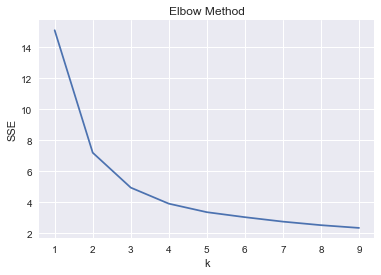

In [8]:
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_norm)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show

In [ ]:
for n_cluster in range(2, 6):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_norm)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.20446635143411915
For n_clusters=3, The Silhouette Coefficient is 0.07046160406322541
For n_clusters=4, The Silhouette Coefficient is -0.018515981002244802
For n_clusters=5, The Silhouette Coefficient is -0.07467391566354542


From the elbow method and the silhouette coefficent, the number of Cluster is 2. But what are the characteristics of the clusters?

In [8]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)

In [40]:
df_y = pd.DataFrame(y_pred)
df_y.columns = ['Cluster']
df_y.head()

,Cluster
0,1
1,1
2,1
3,1
4,1


In [41]:
# Add the outcome back onto X
combined = blank_removed.join(df_y, how='inner', )
combined.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,pace,state,30k,5k,half,20k,country,city,40k,Cluster
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,1
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,1
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,1
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,1
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,1


In [47]:
# Create age buckets

def age_bucket(age):
    output = ''
    if age <=20:
        output = 'Under 20'
    elif (age > 20 and age <= 30):
        output = 'Between 20 and 30'
    elif (age > 30 and age <= 40):
        output = 'Between 30 and 40'
    elif (age > 40 and age <= 50):
        output = 'Between 40 and 50'
    elif (age > 50 and age <= 60):
        output = 'Between 50 and 60'
    else:
        output = 'Over 60'
    
    return output

In [48]:
combined['Age Bucket'] = combined['age'].apply(lambda x: age_bucket(x))

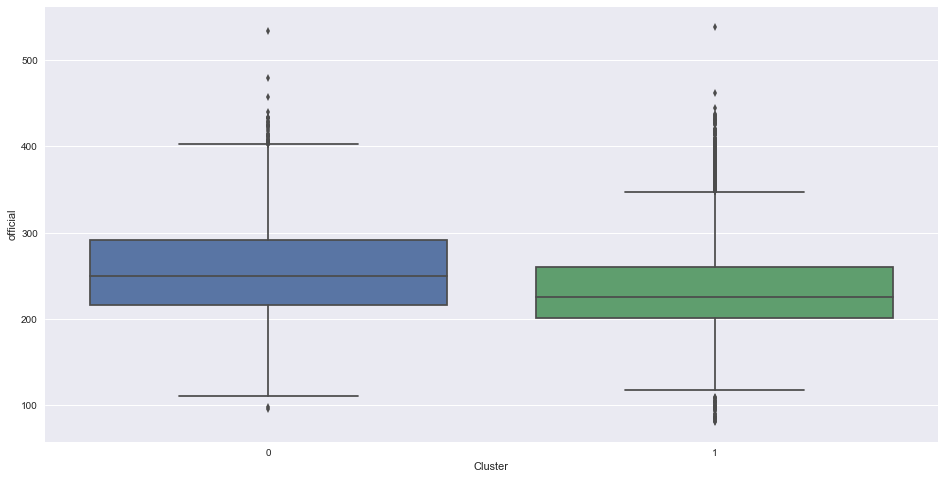

In [45]:
# Official time between the groups
plt.figure(figsize=(16,8))
sns.boxplot(x='Cluster',y='official',data=combined)

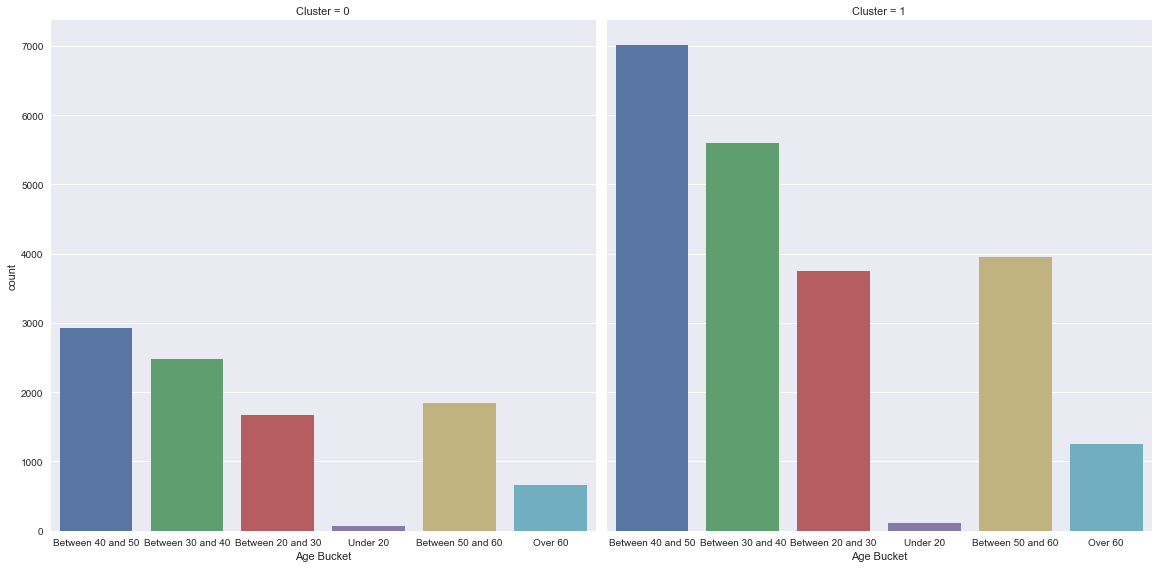

In [49]:
# Look at Gender Breakdown for Count
plt.figure(figsize=(16,8))
sns.factorplot(x='Age Bucket', col='Cluster', kind="count", data=combined, size=8)

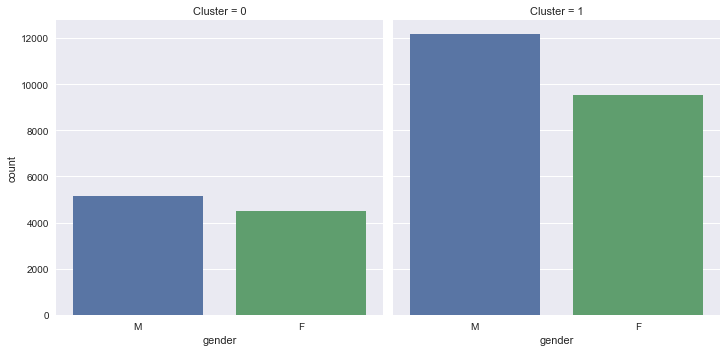

In [51]:
sns.factorplot(x='gender', col='Cluster', kind="count", data=combined, size=5)

In [24]:
# Separate the clusters
cluster0 = combined[combined['Outcome']==0]
cluster1 = combined[combined['Outcome']==1]

In [25]:
# check Gender Breakdown
cluster0['gender'].value_counts()

M    5131
F    4521
Name: gender, dtype: int64

In [26]:
cluster1['gender'].value_counts()

M    12160
F     9524
Name: gender, dtype: int64

Cluster 1 seems to be more elite runners.